In [ ]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
import sys  
!{sys.executable} -m pip install contractions
import contractions
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
!{sys.executable} -m pip install emoji
import emoji
from nltk.stem import WordNetLemmatizer
from textblob import Word
import nltk
import tensorflow as tf
nltk.download('omw-1.4')
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
stemmer = PorterStemmer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 12.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=27aee205fdc855139cadab913f63f09f873ff17da153565a8b7d8b725a098638
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Convert the rating column into (good , neutal and bad)
2) EDA (Wordclouds are a must)
3) Drop irrelevant columns
4) Tokenization and Encoding

-Making the preprocessing pipeline
-Make word Cloud
-Tokenization and Lamitization of the words
-EDA

-Making the preprocessing pipeline
-Make word Cloud
-Tokenization and Lamitization of the words
-EDA

1) Convert the rating column into (good , neutal and bad)
2) EDA (Wordclouds are a must)
3) Drop irrelevant columns
4) Tokenization and Encoding


In [ ]:
df = pd.read_csv('reviews.csv')

In [ ]:
df


,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


<h1>All Preprocessing Functions</h1>
<h5>Contains the functions to change font size to lower, remove urls, stopwords and special characters along with expanding contractions.</h5>

In [ ]:
def low (df,column):
  df[column] = df[column].str.lower()
  return df

def url_remove(df,column):
  df[column] = df[column].str.replace(r'https?:\/\/.*[\r\n]*', '', flags=re.MULTILINE)
  return df

def stopwords_remove(df,column):
  stop_words = set(stopwords.words('english'))
  df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
  return df

def expand_contractions(text):
    return contractions.fix(text)

def expand_cont_df(df,column):
  df[column] = df[column].apply(expand_contractions)
  return df

#def emoji_remove(df,column):
  #df[column = df[column]]


def specialchar_remove(df,column):
  df[column] = df[column].str.replace('[^\w\s]','')
  return df

def lemmatize(df, column):
  df[column]=df[column].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  return df

def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

def stemmer(df, column):
    stemmer = PorterStemmer()
    df[column] = df[column].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
    return df

def remove_short_words(df, column):
    df[column] = df[column].apply(lambda x: " ".join([word for word in x.split() if len(word) >= 4]))
    return df

In [ ]:
low(df,"Review")
url_remove(df,"Review")
stopwords_remove(df,"Review")
expand_cont_df(df,"Review")
specialchar_remove(df,"Review")
lemmatize(df,"Review")
#stemmer(df,"Review")
remove_short_words(df,"Review")
df['Review'].apply(tokenize_text)

<ipython-input-11-ba0d43a31a36>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(r'https?:\/\/.*[\r\n]*', '', flags=re.MULTILINE)
<ipython-input-11-ba0d43a31a36>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('[^\w\s]','')


0        [great, music, service, audio, high, quality, ...
1        [please, ignore, previous, negative, rating, s...
2        [popup, best, spotify, experience, android, an...
3                      [really, buggy, terrible, recently]
4           [dear, spotify, song, playlist, shuffle, play]
                               ...                        
61589    [even, though, communicated, lyric, feature, a...
61590    [sooo, good, back, downloaded, free, version, ...
61591    [would, good, taking, device, start, comp, the...
61592    [good, hard, navigate, play, song, click, play...
61593    [good, sometimes, load, music, play, like, sec...
Name: Review, Length: 61594, dtype: object

In [ ]:
ndf = df.drop(["Time_submitted", "Reply"], axis = "columns")

In [ ]:
ndf

,Review,Rating,Total_thumbsup
0,great music service audio high quality easy al...,5,2
1,please ignore previous negative rating super g...,5,1
2,popup best spotify experience android annoying...,4,0
3,really buggy terrible recently,1,1
4,dear spotify song playlist shuffle play,1,1
...,...,...,...
61589,even though communicated lyric feature availab...,1,6
61590,sooo good back downloaded free version pick so...,1,0
61591,would good taking device start comp there spot...,2,10
61592,good hard navigate play song click play playli...,2,1


<h1> EDA </h1>

In [ ]:
fdist = FreqDist(df["Review"])

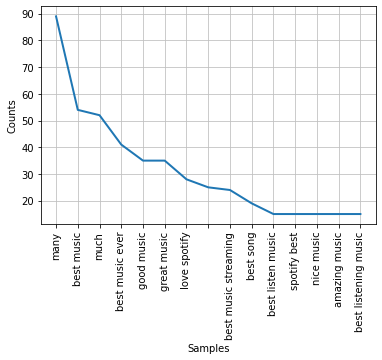

In [ ]:
fdist.plot(15, cumulative=False)
plt.show()

In [ ]:
df = df.replace({'Rating' : { 1 : 'bad', 2 : 'bad', 3 : 'neutral', 4 : 'good', 5 : 'good' }}) 

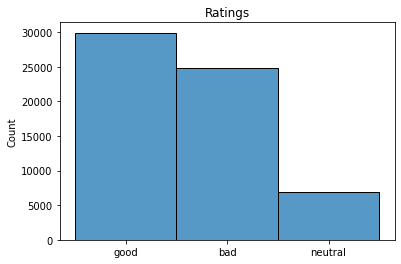

In [ ]:
sns.histplot(df['Rating'])
plt.title('Ratings')
plt.xlabel('')
plt.show()

<h2>SMOTE </h2>


In [ ]:
sm = SMOTE(sampling_strategy = "not minority",random_state = 42)
smote_labels

<h2> Wordclouds </h2>

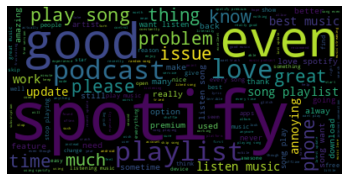

In [ ]:
text = " ".join(review for review in df["Review"])

# Generate a word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

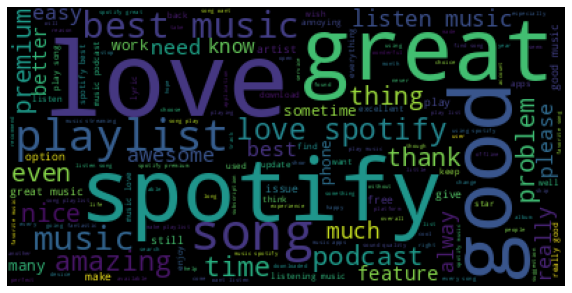

In [ ]:
good = df[df['Rating'] == 'good']['Review'] #good word map
#print(good)

plt.figure(figsize=(10,10))
wc = WordCloud().generate(' '.join(good))

plt.axis('off')
plt.imshow(wc)

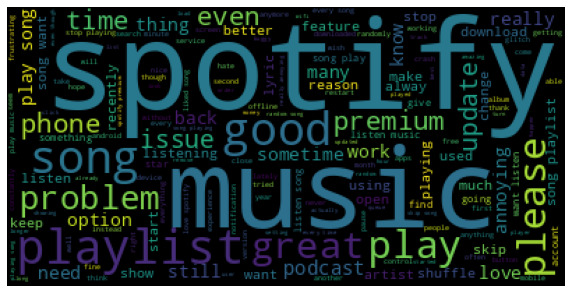

In [ ]:
neutral = df[df['Rating'] == 'neutral']['Review'] #good word map
#print(good)

plt.figure(figsize=(10,10))
wc = WordCloud().generate(' '.join(neutral))

plt.axis('off')
plt.imshow(wc)

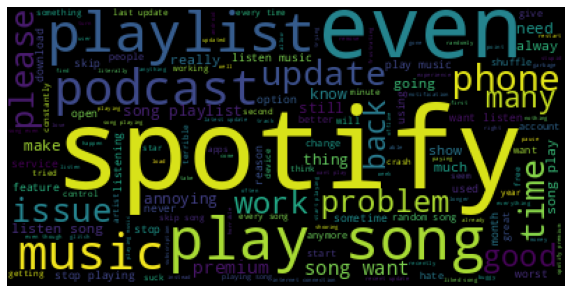

In [ ]:
bad = df[df['Rating'] == 'bad']['Review'] #good word map
#print(good)

plt.figure(figsize=(10,10))
wc = WordCloud().generate(' '.join(bad))

plt.axis('off')
plt.imshow(wc)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Review'].values)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))
x = tokenizer.texts_to_sequences(df['Review'].values)
x = pad_sequences(x, maxlen = 20)




Total distinct words: 25805


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df['Rating'], test_size=0.33, random_state = 42)

In [ ]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

In [ ]:
print(test_labels)

[[1 0 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 1 0]
 [1 0 0]
 [0 1 0]]


In [45]:
model_lstm = tf.keras.models.Sequential([tf.keras.layers.Embedding(input_dim = total_word + 1,output_dim = 75, input_length = 20, trainable = True),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(17)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(17, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 75)            1935450   
                                                                 
 bidirectional_3 (Bidirectio  (None, 34)               12648     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 34)                0         
                                                                 
 dense_7 (Dense)             (None, 17)                595       
                                                                 
 dropout_7 (Dropout)         (None, 17)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 54        
                                                      

In [46]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = total_word + 1,output_dim = 100, input_length = 20, trainable = True))
model.add(LSTM(units = 196, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           2580600   
                                                                 
 lstm_1 (LSTM)               (None, 196)               232848    
                                                                 
 dense_2 (Dense)             (None, 3)                 591       
                                                                 
Total params: 2,814,039
Trainable params: 2,814,039
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001,weight_decay = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, train_labels, epochs=5, validation_data=(X_test, test_labels))

Epoch 1/5
1290/1290 [==============================] - 256s 195ms/step - loss: 0.7265 - accuracy: 0.7011 - val_loss: 0.6184 - val_accuracy: 0.7660
Epoch 2/5
1290/1290 [==============================] - 237s 184ms/step - loss: 0.5920 - accuracy: 0.7754 - val_loss: 0.5983 - val_accuracy: 0.7758
Epoch 3/5
1290/1290 [==============================] - 232s 180ms/step - loss: 0.5573 - accuracy: 0.7884 - val_loss: 0.5852 - val_accuracy: 0.7792
Epoch 4/5
1290/1290 [==============================] - 233s 180ms/step - loss: 0.5335 - accuracy: 0.7947 - val_loss: 0.6014 - val_accuracy: 0.7785
Epoch 5/5
1290/1290 [==============================] - 221s 172ms/step - loss: 0.5138 - accuracy: 0.8007 - val_loss: 0.5870 - val_accuracy: 0.7762


In [47]:
model_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001,weight_decay = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm.fit(X_train, train_labels, epochs=5, validation_data=(X_test, test_labels))

Epoch 1/5
1290/1290 [==============================] - 78s 56ms/step - loss: 0.9021 - accuracy: 0.6006 - val_loss: 0.6626 - val_accuracy: 0.7584
Epoch 2/5
1290/1290 [==============================] - 75s 58ms/step - loss: 0.6918 - accuracy: 0.7589 - val_loss: 0.6089 - val_accuracy: 0.7746
Epoch 3/5
1290/1290 [==============================] - 70s 55ms/step - loss: 0.6364 - accuracy: 0.7802 - val_loss: 0.5925 - val_accuracy: 0.7757
Epoch 4/5
1290/1290 [==============================] - 73s 56ms/step - loss: 0.5984 - accuracy: 0.7898 - val_loss: 0.5871 - val_accuracy: 0.7763
Epoch 5/5
1290/1290 [==============================] - 89s 69ms/step - loss: 0.5705 - accuracy: 0.7982 - val_loss: 0.5893 - val_accuracy: 0.7749


In [48]:
model_lstm.save('model.h5')

In [ ]:
model.save('model.h5')

In [50]:
from keras.models import load_model
from keras.backend import manual_variable_initialization
manual_variable_initialization(False)
ps =PorterStemmer()
#load weights
mod = load_model('model.h5')
mod.load_weights('model.h5')
mod

In [51]:
mod.evaluate(X_test, test_labels)

636/636 [==============================] - 5s 6ms/step - loss: 0.5893 - accuracy: 0.7749


[0.5892897248268127, 0.7748807072639465]

In [ ]:
def predict_sentiment(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    # review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus = [review]
    X = tokenizer.texts_to_sequences(corpus)
    X = pad_sequences(X, maxlen=20)
    sentiment = mod.predict(X,batch_size=1,verbose = 2)
    if(np.argmax(sentiment) == 0):
        return("negative")
    elif (np.argmax(sentiment) == 1):
        return("neutral")
    elif (np.argmax(sentiment) == 2):
        return("positive")

In [ ]:
sent= predict_sentiment("good good good good")
print(sent)

1/1 - 0s - 385ms/epoch - 385ms/step
neutral
